# Ultra-Edge

## Overview

In this sub-project, we'll use a data-driven approach to detect close-calls of bat-ball contacts in cricket by analyzing audio frequencies.

### Objective

Detect spikes in specific frequency ranges that indicate bat-ball strikes.

### Challenges

Crowd noise interference.

### Approach

Frequency Analysis: Identify spikes in bat-ball strike frequency band-gaps using a frequency spectroid tool.
Noise Suppression: Use two microphones (one near the bat, one further away) to filter out crowd noise.
By implementing these steps, we'll accurately detect bat-ball contact close-calls. For more on noise suppression, see [this](https://www.100ms.live/blog/noise-suppression) blog.


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import glob as glob
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [34]:
pos_files = glob.glob("./data/out/*.mp3")
neg_files = glob.glob("./data/not-out/*.mp3")
print(f'pos_files: {len(pos_files)}')
print(f'neg_files: {len(neg_files)}')

pos_files: 3
neg_files: 2


In [35]:
ipd.Audio(pos_files[2])

In [36]:
y1, sr1 = librosa.load(pos_files[2])
print(f'y1: {y1[:10]}')
print(f'shape y1: {y1.shape}')
print(f'sr1: {sr1}')

y2, sr2 = librosa.load(neg_files[1])
print(f'y2: {y2[:10]}')
print(f'shape y2: {y2.shape}')
print(f'sr2: {sr2}')

y1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape y1: (35986,)
sr1: 22050
y2: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape y2: (57154,)
sr2: 22050


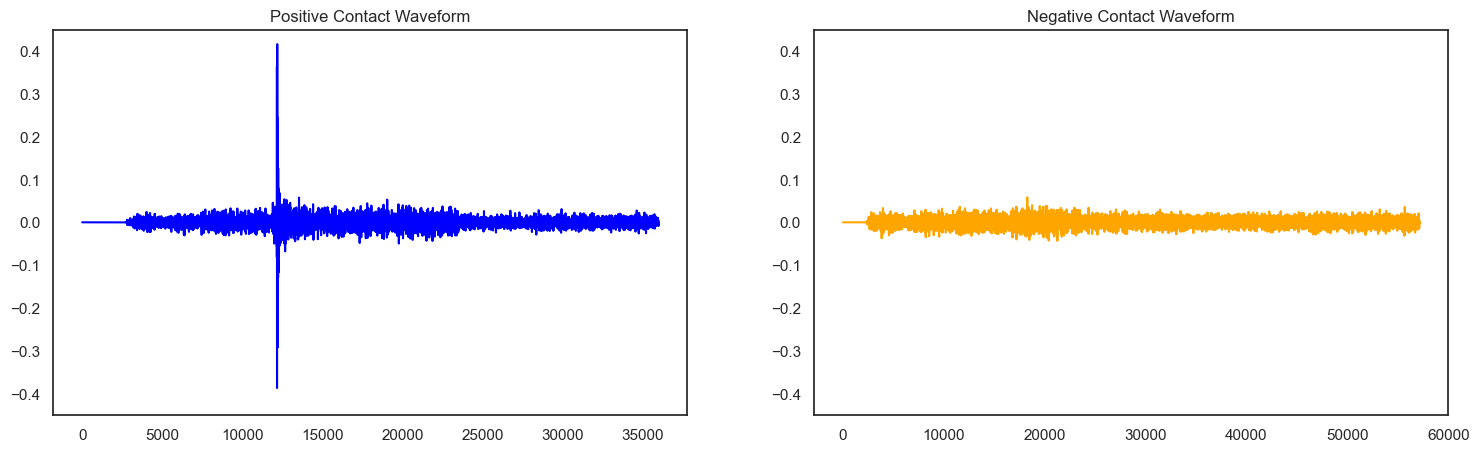

In [37]:
y_lims = (-0.45, 0.45)

plt.figure(figsize=(18, 5))

# First subplot
plt.subplot(1, 2, 1)
plt.plot(y1, color='blue')
plt.title("Positive Contact Waveform")
plt.ylim(y_lims)

# Second subplot
plt.subplot(1, 2, 2)
plt.plot(y2, color='orange')
plt.title("Negative Contact Waveform")
plt.ylim(y_lims)

plt.show()

As we can see, we have a spike in the given data. But we **also** need to determine if the rise of amplitude is within the desired range of our **bat-ball** collision/hit frequency range which is between 3500-7000 depending on types of materials.

### Let's do a spectogram analysis to determine frequencies of the spikes (high amplitude data points)

In [38]:
D = librosa.stft(y1)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 71)

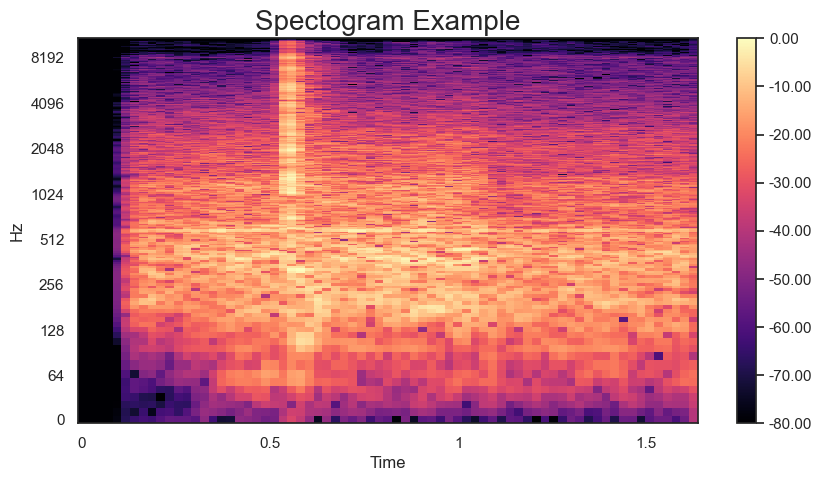

In [39]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

### Mel Spectogram Results

In [40]:
S = librosa.feature.melspectrogram(y=y1,
                                   sr=sr1,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

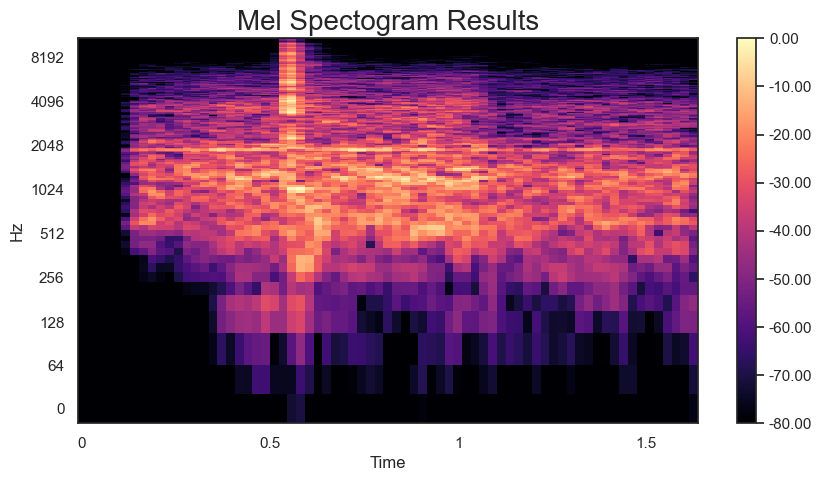

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Results', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

### As we can clearly see high amplitude withing our given range. Hence, now we can confirm that there **was** a bat-ball contact.